In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
from collections import defaultdict
import matplotlib.patches as mpatches

sns.set_style("ticks")

In [98]:
def make_plots(stats,model_id):
    
    fig, axes = plt.subplots(4, 2, figsize=(15, 12))
    ax_00 = axes[0][0].twinx()
    ax_01 = axes[0][1].twinx()
    ax_11 = axes[1][1].twinx() 
    ax_21 = axes[2][1].twinx()
    ax_31 = axes[3][1].twinx()

    for i in range(3):
        axes[0][0].plot(stats['epoch_loss'][i], color="tab:blue")
        axes[0][0].set_ylabel("Running Loss")
        ax_00.plot(stats["knn_acc"][i], color="tab:orange",alpha = 0.5)
    #ax_1.set_ylabel("KNN Acc")

        blue = mpatches.Patch(color='tab:blue', label='Loss')
        axes[0][0].legend(loc='upper left',handles=[blue])
        orange = mpatches.Patch(color='tab:orange', label='KNN Acc')
        ax_00.legend(loc='lower right',handles=[orange])

        axes[1][0].plot(stats['backbone_sim'][i], color="tab:cyan", alpha=0.5)
        cyan = mpatches.Patch(color='tab:cyan', label='Backbone Sim')
        axes[1][0].legend(handles=[cyan])
        axes[1][0].set_ylabel("Backbone Sim")

        axes[2][0].plot(stats['encoder_sim'][i], color="tab:green", alpha=0.5)
        green = mpatches.Patch(color='tab:green', label='Projector Sim')
        axes[2][0].legend(handles=[green])
        axes[2][0].set_ylabel("Sim")

        axes[3][0].plot(stats['predictor_sim'][i], color="tab:purple", alpha=0.5)
        purple = mpatches.Patch(color='tab:purple', label='Predictor Sim')
        axes[3][0].legend(handles=[purple])
        axes[3][0].set_ylabel("Sim")
        axes[3][0].set_xlabel("Batches/Epochs")

        axes[0][1].plot(stats['epoch_loss'][i], color="tab:blue")
        #axes[0][1].set_ylabel("Running Loss")
    
        ax_01.plot(stats["knn_acc"][i], color="tab:orange", label="Acc",alpha = 0.5)
        ax_01.set_ylabel("KNN Acc")
        axes[0][1].legend(loc='upper left')
        blue = mpatches.Patch(color='tab:blue', label='Loss')
        ax_01.legend(loc='lower right',handles=[orange])
        axes[0][1].legend(loc='upper left',handles=[blue])

        axes[1][1].plot(stats['backbone_norm'][i], color="tab:cyan", label='Backbone_Norm')
        cyan = mpatches.Patch(color='tab:cyan', label='Backbone Norm')
        axes[1][1].legend(loc='lower left',handles=[cyan])
        axes[1][1].set_ylabel("Norm")

        ax_11.plot(stats['backbone_std'][i],color='silver')
        gray = mpatches.Patch(color='silver', label='Backbone Std')
        ax_11.legend(loc='upper right',handles=[gray])
        ax_11.set_ylabel("Std")

        axes[2][1].plot(stats['encoder_norm'][i], color="tab:green", label='Projector_Norm')
        green = mpatches.Patch(color='tab:green', label='Projector Norm')
        axes[2][1].legend(handles=[green],loc='lower left')
        axes[2][1].set_ylabel("Norm")
        
        ax_21.plot(stats['encoder_std'][i],color='silver')
        gray = mpatches.Patch(color='silver', label='Projector Std')
        ax_21.legend(loc='upper right',handles=[gray])
        ax_21.set_ylabel("Std")

        axes[3][1].plot(stats['predictor_norm'][i], color="tab:purple", label='Predictor_Norm')
        purple = mpatches.Patch(color='tab:purple', label='Predictor Norm')
        axes[3][1].legend(handles=[purple],loc='lower left')
        axes[3][1].set_ylabel("Norm")
        ax_31.plot(stats['predictor_std'][i],color='silver')
        gray = mpatches.Patch(color='silver', label='Predictor Std')
        ax_31.legend(loc='upper right',handles=[gray])
        ax_31.set_ylabel("Std")
        axes[3][1].set_xlabel("Batches/Epochs")

    fig.suptitle(model_id);
    plt.tight_layout()
    return fig

In [109]:
def make_plots(stats,model_id):
    
    fig, axes = plt.subplots(4, 2, figsize=(15, 12))
    axes[0][0].plot(stats['epoch_loss'], color="tab:blue")
    axes[0][0].set_ylabel("Running Loss")
    ax_1 = axes[0][0].twinx()
    ax_1.plot(stats["knn_acc"], color="tab:orange",alpha = 0.5)
    #ax_1.set_ylabel("KNN Acc")

    blue = mpatches.Patch(color='tab:blue', label='Loss')
    axes[0][0].legend(loc='upper left',handles=[blue])
    orange = mpatches.Patch(color='tab:orange', label='KNN Acc')
    ax_1.legend(loc='lower right',handles=[orange])

    axes[1][0].plot(stats['backbone_sim'], color="tab:cyan", alpha=0.5)
    cyan = mpatches.Patch(color='tab:cyan', label='Backbone Sim')
    axes[1][0].legend(handles=[cyan])
    axes[1][0].set_ylabel("Backbone Sim")

    axes[2][0].plot(stats['encoder_sim'], color="tab:green", alpha=0.5)
    green = mpatches.Patch(color='tab:green', label='Projector Sim')
    axes[2][0].legend(handles=[green])
    axes[2][0].set_ylabel("Sim")

    axes[3][0].plot(stats['predictor_sim'], color="tab:purple", alpha=0.5)
    purple = mpatches.Patch(color='tab:purple', label='Predictor Sim')
    axes[3][0].legend(handles=[purple])
    axes[3][0].set_ylabel("Sim")
    axes[3][0].set_xlabel("Batches/Epochs")

    axes[0][1].plot(stats['epoch_loss'], color="tab:blue")
    #axes[0][1].set_ylabel("Running Loss")
    ax_1 = axes[0][1].twinx()
    ax_1.plot(stats["knn_acc"], color="tab:orange", label="Acc",alpha = 0.5)
    ax_1.set_ylabel("KNN Acc")
    axes[0][1].legend(loc='upper left')
    blue = mpatches.Patch(color='tab:blue', label='Loss')
    ax_1.legend(loc='lower right',handles=[orange])
    axes[0][1].legend(loc='upper left',handles=[blue])

    axes[1][1].plot(stats['backbone_norm'], color="tab:cyan", label='Backbone_Norm')
    cyan = mpatches.Patch(color='tab:cyan', label='Backbone Norm')
    axes[1][1].legend(loc='lower left',handles=[cyan])
    axes[1][1].set_ylabel("Norm")
    
    ax_1 = axes[1][1].twinx() 
    ax_1.plot(stats['backbone_std'],color='silver')
    gray = mpatches.Patch(color='silver', label='Backbone Std')
    ax_1.legend(loc='upper right',handles=[gray])
    ax_1.set_ylabel("Std")
    
    axes[2][1].plot(stats['encoder_norm'], color="tab:green", label='Projector_Norm')
    green = mpatches.Patch(color='tab:green', label='Projector Norm')
    axes[2][1].legend(handles=[green],loc='lower left')
    axes[2][1].set_ylabel("Norm")
    ax_1 = axes[2][1].twinx()
    ax_1.plot(stats['encoder_std'],color='silver')
    gray = mpatches.Patch(color='silver', label='Projector Std')
    ax_1.legend(loc='upper right',handles=[gray])
    ax_1.set_ylabel("Std")

    axes[3][1].plot(stats['predictor_norm'], color="tab:purple", label='Predictor_Norm')
    purple = mpatches.Patch(color='tab:purple', label='Predictor Norm')
    axes[3][1].legend(handles=[purple],loc='lower left')
    axes[3][1].set_ylabel("Norm")
    ax_1 = axes[3][1].twinx()
    ax_1.plot(stats['predictor_std'],color='silver')
    gray = mpatches.Patch(color='silver', label='Predictor Std')
    ax_1.legend(loc='upper right',handles=[gray])
    ax_1.set_ylabel("Std")
    axes[3][1].set_xlabel("Batches/Epochs")

    fig.suptitle(model_id);
    plt.tight_layout()
    return fig

## Make Plots

In [151]:
# stats_1 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_rep_0/final_subjectivity_ADAM_64_30_128_rep_0.pth')['stats']
# stats_2 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_rep_1/final.pth')['stats']
# stats_3 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_rep_2/final.pth')['stats']

# stats_1 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../SIMCLR_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../SIMCLR_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../SIMCLR_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../SIMCLR_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_1/final.pth')['stats']
# stats_2 = torch.load('../SIMCLR_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_2/final.pth')['stats']
# stats_3 = torch.load('../SIMCLR_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_3/final.pth')['stats']

#stats_1 = torch.load('../SIMCLR_GRAPH_CKPTS//subjectivity_ADAM_64_30_128_s_0.1_n_0.1_rep_2/final.pth')['stats']
#stats_2 = torch.load('../SIMCLR_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_rep_3/final.pth')['stats']
#stats_3 = torch.load('../SIMCLR_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_rep_3/final.pth')['stats']

# stats_1 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_0/final.pth')['stats']
# stats_2 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_1/final.pth')['stats']
# stats_3 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_2/final.pth')['stats']

# stats_1 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_0/final.pth')['stats']
# stats_2 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_1/final.pth')['stats']
# stats_3 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_2/final.pth')['stats']


# stats_1 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_4_rep_3/final.pth')['stats']

# stats_1 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_2_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_2_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_n_0.1_window_2_rep_3/final.pth')['stats']

# stats_1 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_2_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_2_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_window_2_rep_3/final.pth')['stats']

# stats_1 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_0/final.pth')['stats']
# stats_2 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_1/final.pth')['stats']
# stats_3 = torch.load('../GRAPH_CKPTS/subjectivity_ADAM_64_30_128_s_0.1_s_0.1_rep_2/final.pth')['stats']

# stats_1 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_2_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_2_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_2_rep_3/final.pth')['stats']

# stats_1 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_1/final.pth')['stats']
# stats_2 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_2/final.pth')['stats']
# stats_3 = torch.load('../BYOL_NLP_CKPTS/subjectivity_ADAM_64_30_128_window_4_rep_3/final.pth')['stats']

In [153]:
stats_consolidated= {}
stats_consolidated['backbone_sim']= np.array([stats_1['backbone_sim'],stats_2['backbone_sim'],stats_3['backbone_sim']],dtype=object).T
stats_consolidated['encoder_sim'] =np.array([stats_1['encoder_sim'],stats_2['encoder_sim'],stats_3['encoder_sim']],dtype=object).T
stats_consolidated['predictor_sim'] =np.array([stats_1['predictor_sim'],stats_2['predictor_sim'],stats_3['predictor_sim']],dtype=object).T
stats_consolidated['epoch_loss'] =np.array([stats_1['epoch_loss'],stats_2['epoch_loss'],stats_3['epoch_loss']],dtype=object).T
stats_consolidated['knn_acc'] =np.array([stats_1['knn_acc'],stats_2['knn_acc'],stats_3['knn_acc']],dtype=object).T
stats_consolidated['backbone_norm']= np.array([stats_1['backbone_norm'],stats_2['backbone_norm'],stats_3['backbone_norm']],dtype=object).T
stats_consolidated['backbone_std']= np.array([stats_1['backbone_std'],stats_2['backbone_std'],stats_3['backbone_std']],dtype=object).T
stats_consolidated['encoder_norm']= np.array([stats_1['encoder_norm'],stats_2['encoder_norm'],stats_3['encoder_norm']],dtype=object).T
stats_consolidated['encoder_std']= np.array([stats_1['encoder_std'],stats_2['encoder_std'],stats_3['encoder_std']],dtype=object).T
stats_consolidated['predictor_norm']= np.array([stats_1['predictor_norm'],stats_2['predictor_norm'],stats_3['predictor_norm']],dtype=object).T
stats_consolidated['predictor_std']= np.array([stats_1['predictor_std'],stats_2['predictor_std'],stats_3['predictor_std']],dtype=object).T


In [154]:
stats_consolidated['epoch_loss'].shape

(24, 3)

No handles with labels found to put in legend.


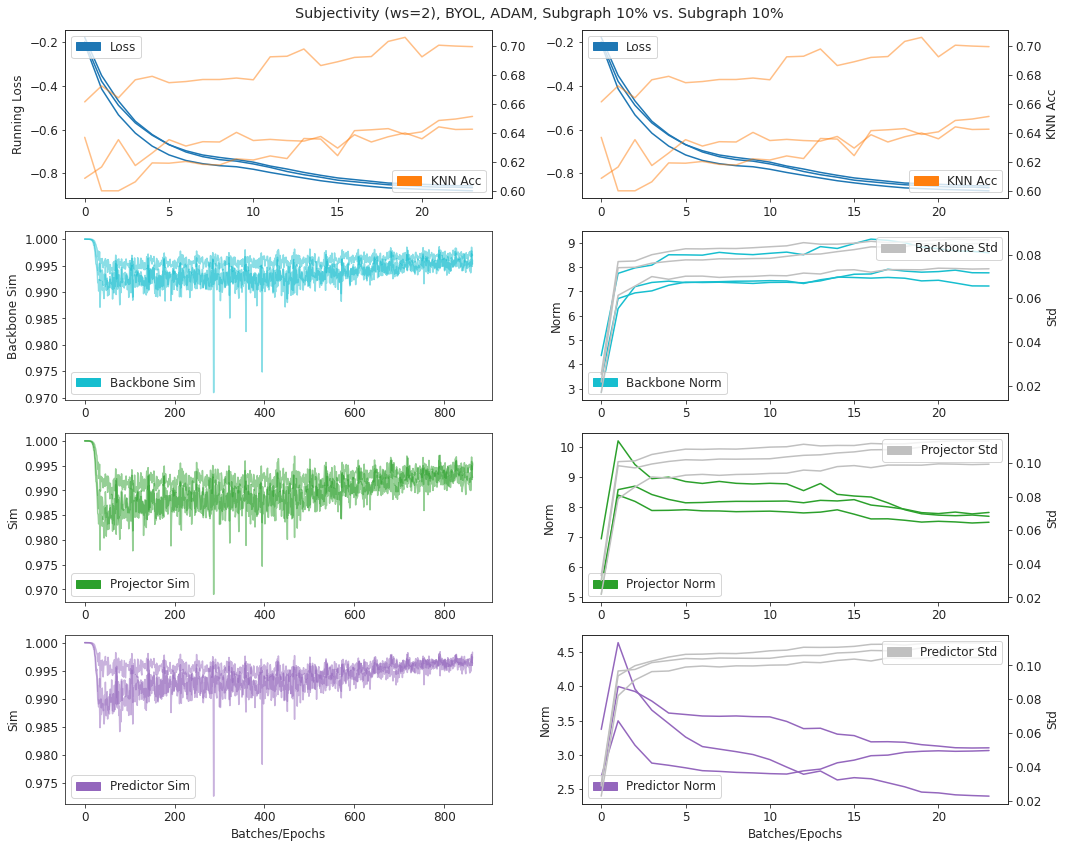

In [155]:
plt.rcParams['font.size'] = 12
fig = make_plots(stats_consolidated,'Subjectivity (ws=2), BYOL, ADAM, Subgraph 10% vs. Subgraph 10%')
fig.savefig("BYOL_TEXT_WS_2_ADAM_s_10_s_10.pdf")